In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import subprocess as sp
%matplotlib inline

In [3]:
def imshow(tit, image):
    plt.title(tit)
    if len(image.shape) == 3:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap = 'gray')
    plt.show()

# 1. 공간 필터링(모션 블러링 -> 가로축에 대해서만 평균 냄)

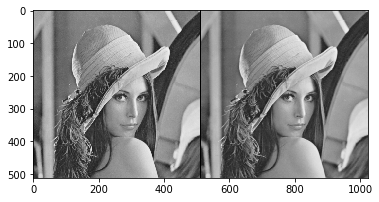

In [6]:
src = cv2.imread('lenna.bmp', 0)

dst = np.zeros(src.shape, dtype=np.uint8)

for r in range(1, src.shape[0]-1) :
    for c in range(1, src.shape[1]-1) :
        sum = ( int(src[r,c-1]) + src[r,c] + src[r,c+1] ) / 3  # uint8끼리 더하기 때문에 오버플로우가 발생함(int32가 아님)
                                                                # 셋중 하나라도 int 타입으로 바꿔주면 됨.
        dst[r,c] = np.uint8(sum)                
imshow("", np.hstack((src,dst)))

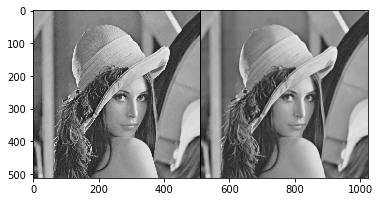

In [13]:
src = cv2.imread('lenna.bmp', 0)

dst = np.zeros(src.shape, dtype=np.uint8)

for r in range(1, src.shape[0]-1) :
    for c in range(1, src.shape[1]-1) :
        sum = 0
        for r1 in range(-1, 2) :
            for c1 in range(-1, 2) : 
                sum += src[r + r1, c + c1]   # kernel 사이즈를 키워가면서 할 수 있다.
                
        dst[r,c] = sum/9              
imshow("", np.hstack((src,dst)))

In [21]:
src = cv2.imread('lenna.bmp', 0)

dst = np.zeros(src.shape, dtype=np.uint8)

for r in range(5, src.shape[0]-5) :
    for c in range(5, src.shape[1]-5) :
        sum = 0
        for r1 in range(-5, 6) :
            for c1 in range(-5, 6) : 
                sum += src[r + r1, c + c1]   # kernel 사이즈를 키워가면서 할 수 있다.

        dst[r,c] = sum/(11*11)              
imshow("", np.hstack((src,dst)))

# 주변픽셀을 많이 참조했더니 눈에띄게 blurring 된걸 볼 수 있음.
# 필터가 많이 고려하면, 엄청 느려짐 -> 연산이 배가 되기 때문에

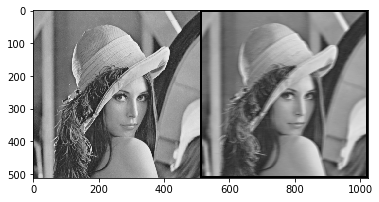

In [19]:
src = cv2.imread('lenna.bmp', 0)

dst = np.zeros(src.shape, dtype=np.uint8)

for r in range(5, src.shape[0]-5) :
    for c in range(5, src.shape[1]-5) :
        sum = 0
        for c1 in range(-5, 6) : 
            sum += src[r + r1, c + c1]   # kernel 사이즈를 키워가면서 할 수 있다.
                
        dst[r,c] = sum/11            
imshow("", np.hstack((src,dst)))

# 주변픽셀을 많이 참조했더니 눈에띄게 blurring 된걸 볼 수 있음.
# 필터가 많이 고려하면, 엄청 느려짐 -> 연산이 배가 되기 때문에
# 모션블러로 만든 형태

# 엣지 검출 법 -> (-) 연산
- 수평 엣지 + 수직 엣지 해야 완벽한 엣지를 찾을 수 있음

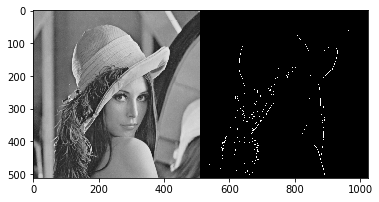

In [5]:
src = cv2.imread('lenna.bmp', 0)

dst = np.zeros(src.shape, dtype=np.uint8)

for r in range(5, src.shape[0]-5) :
    for c in range(5, src.shape[1]-5) :
        out = np.abs(int(src[r,c]) - src[r,c+1])    # -255 ~ 255  ( 0 - 255 / 255 - 0 ) 따라서 절댓값 취해줘 봄
        dst[r,c] = out
        
        
dst = (dst > 50) * 255      # 이진화 시켜버리기        
dst = dst.astype('uint8')

imshow("", np.hstack((src, dst)))

cv2.imshow('dst', np.hstack((src, dst)))  # openCV 전용 윈도우 창에 띄우는 법
cv2.waitKey()
cv2.destroyAllWindows()

# 밝기의 차이가 급 변하는 곳이 두드러짐 -> 엣지부분 추출 : (-) 연산

# 수평 엣지 + 수직 엣지 검출해서 더함

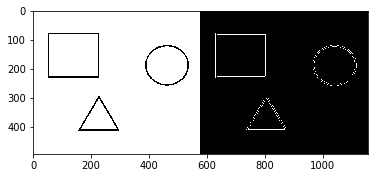

In [7]:
src = cv2.imread('shape.png', 0)

dst = np.zeros(src.shape, dtype=np.uint8)

for r in range(5, src.shape[0]-5) :
    for c in range(5, src.shape[1]-5) :
#       out = np.abs(int(src[r,c]) - src[r-1,c])  # -255 ~ 255  ( 0 - 255 / 255 - 0 ) 따라서 절댓값 취해줘 봄
        out = np.abs(int(src[r,c]) - src[r,c-1])
        out2 = np.abs(int(src[r,c]) - src[r-1,c])
        dst[r,c] = (out + out2)/2
        
        
dst = (dst > 20) * 255      # 이진화 시켜버리기        
dst = dst.astype('uint8')

imshow("", np.hstack((src, dst)))

cv2.imshow('dst', np.hstack((src, dst)))  # openCV 전용 윈도우 창에 띄우는 법
cv2.waitKey()
cv2.destroyAllWindows()

# 기본적으로 edge 연산을 통해 모형의 외형을 뽑아낼 수 있음.
# 내꺼에서 오른쪽을 뺀 것.따라서 가로선은 검출이 안됨.

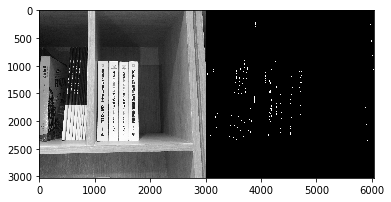

In [7]:
src = cv2.imread('book.jpg', 0)

dst = np.zeros(src.shape, dtype=np.uint8)

for r in range(5, src.shape[0]-5) :
    for c in range(5, src.shape[1]-5) :
        out = np.abs(int(src[r,c]) - src[r,c+1])    # -255 ~ 255  ( 0 - 255 / 255 - 0 ) 따라서 절댓값 취해줘 봄
        dst[r,c] = out
        
        
dst = (dst > 50) * 255      # 이진화 시켜버리기        
dst = dst.astype('uint8')

imshow("", np.hstack((src, dst)))

cv2.imshow('dst', np.hstack((src, dst)))  # openCV 전용 윈도우 창에 띄우는 법
cv2.waitKey()
cv2.destroyAllWindows()

# 기본적으로 edge 연산을 통해 모형의 외형을 뽑아낼 수 있음.

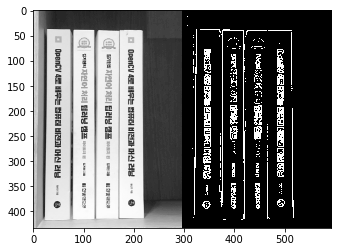

In [11]:
src = cv2.imread('book1.png', 0)
# src = cv2.resize(src, dsize=(640,480))

dst = np.zeros(src.shape, dtype=np.uint8)

for r in range(5, src.shape[0]-5) :
    for c in range(5, src.shape[1]-5) :
        out = np.abs(int(src[r,c]) - src[r,c+1])    # -255 ~ 255  ( 0 - 255 / 255 - 0 ) 따라서 절댓값 취해줘 봄
        out2 = np.abs(int(src[r,c]) - src[r-1,c])
        dst[r,c] = (out + out2)/2
        
        
dst = (dst > 20) * 255      # 이진화 시켜버리기        
dst = dst.astype('uint8')

imshow("", np.hstack((src, dst)))

cv2.imshow('dst', np.hstack((src, dst)))  # openCV 전용 윈도우 창에 띄우는 법
cv2.waitKey()
cv2.destroyAllWindows()

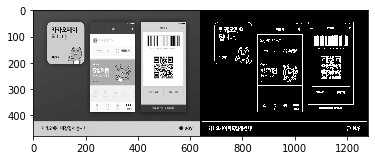

In [13]:
src = cv2.imread('kakao.jpg', 0)
src = cv2.resize(src, dsize=(640,480))

dst = np.zeros(src.shape, dtype=np.uint8)

for r in range(5, src.shape[0]-5) :
    for c in range(5, src.shape[1]-5) :
        out = np.abs(int(src[r,c]) - src[r,c+1])    # -255 ~ 255  ( 0 - 255 / 255 - 0 ) 따라서 절댓값 취해줘 봄
        out2 = np.abs(int(src[r,c]) - src[r-1,c])   # 그러니까 색 차이가 큰 것들은 255로 나머지는 0으로 이진화 시켜버리기
        dst[r,c] = (out + out2)/2
        
        
dst = (dst > 20) * 255      # 이진화 시켜버리기        
dst = dst.astype('uint8')

imshow("", np.hstack((src, dst)))

cv2.imshow('dst', np.hstack((src, dst)))  # openCV 전용 윈도우 창에 띄우는 법
cv2.waitKey()
cv2.destroyAllWindows()

# 컨벌루션

In [15]:
# mask를 먼저 만듦.
mask = np.array([
    [1/9.0, 1/9.0, 1/9.0],
    [1/9.0, 1/9.0, 1/9.0],
    [1/9.0, 1/9.0, 1/9.0]
])

print(mask)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


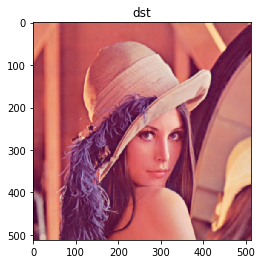

uint8


In [17]:
src = cv2.imread('lenna.bmp')      # 평균 필터 적용
dst = cv2.filter2D(src, -1, mask)  # RGB 채널을 다 적용해도 빠름
imshow('dst',dst)
print(dst.dtype)                   # 원본과 똑같은 타입임 (uint8)
                                   # 마스크는 float타입이지만, 계산 후 uint8로 다시 변환해서 나옴

In [18]:
# 빼기 마스크(윤곽선)
mask = np.array([
    [0, 0,  0],
    [0, 1, -1],
    [0, 0,  0]
])

print(mask)

[[ 0  0  0]
 [ 0  1 -1]
 [ 0  0  0]]


In [26]:
src = src.astype('float')   # 빼기 필터 적용, 엣지 추출 마스크
print(src.dtype)            # 데이터의 표현범위를 확장 시켜논 것임 int32 타입이기 때문에 (-)값까지 들어감
print(src)

float64
[[[125. 137. 226.]
  [125. 137. 226.]
  [133. 137. 223.]
  ...
  [122. 148. 230.]
  [110. 130. 221.]
  [ 90.  99. 200.]]

 [[125. 137. 226.]
  [125. 137. 226.]
  [133. 137. 223.]
  ...
  [122. 148. 230.]
  [110. 130. 221.]
  [ 90.  99. 200.]]

 [[125. 137. 226.]
  [125. 137. 226.]
  [133. 137. 223.]
  ...
  [122. 148. 230.]
  [110. 130. 221.]
  [ 90.  99. 200.]]

 ...

 [[ 60.  18.  84.]
  [ 60.  18.  84.]
  [ 58.  27.  92.]
  ...
  [ 84.  73. 173.]
  [ 76.  68. 172.]
  [ 79.  62. 177.]]

 [[ 57.  22.  82.]
  [ 57.  22.  82.]
  [ 62.  32.  96.]
  ...
  [ 79.  70. 179.]
  [ 81.  71. 181.]
  [ 81.  74. 185.]]

 [[ 57.  22.  82.]
  [ 57.  22.  82.]
  [ 62.  32.  96.]
  ...
  [ 79.  70. 179.]
  [ 81.  71. 181.]
  [ 81.  74. 185.]]]


In [28]:
dst = cv2.filter2D(src, -1, mask)    # RGB 채널을 다 적용해도 빠름  ->  이 계산을 하는 순간 uint8로 타입이 바뀌었음.
print(dst.dtype)
print(dst)                           # uint8 타입은 - 값을 표현할 수 없기 때문에, float로 바꾸고 필터링을 해야 더 넓은 범위

float64
[[[  0.   0.   0.]
  [ -8.   0.   3.]
  [  5.   1.   0.]
  ...
  [ 12.  18.   9.]
  [ 20.  31.  21.]
  [-20. -31. -21.]]

 [[  0.   0.   0.]
  [ -8.   0.   3.]
  [  5.   1.   0.]
  ...
  [ 12.  18.   9.]
  [ 20.  31.  21.]
  [-20. -31. -21.]]

 [[  0.   0.   0.]
  [ -8.   0.   3.]
  [  5.   1.   0.]
  ...
  [ 12.  18.   9.]
  [ 20.  31.  21.]
  [-20. -31. -21.]]

 ...

 [[  0.   0.   0.]
  [  2.  -9.  -8.]
  [  0.   6.  -1.]
  ...
  [  8.   5.   1.]
  [ -3.   6.  -5.]
  [  3.  -6.   5.]]

 [[  0.   0.   0.]
  [ -5. -10. -14.]
  [  0.   4.   3.]
  ...
  [ -2.  -1.  -2.]
  [  0.  -3.  -4.]
  [  0.   3.   4.]]

 [[  0.   0.   0.]
  [ -5. -10. -14.]
  [  0.   4.   3.]
  ...
  [ -2.  -1.  -2.]
  [  0.  -3.  -4.]
  [  0.   3.   4.]]]


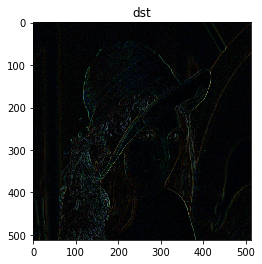

[[[ 0  0  0]
  [ 8  0  3]
  [ 5  1  0]
  ...
  [12 18  9]
  [20 31 21]
  [20 31 21]]

 [[ 0  0  0]
  [ 8  0  3]
  [ 5  1  0]
  ...
  [12 18  9]
  [20 31 21]
  [20 31 21]]

 [[ 0  0  0]
  [ 8  0  3]
  [ 5  1  0]
  ...
  [12 18  9]
  [20 31 21]
  [20 31 21]]

 ...

 [[ 0  0  0]
  [ 2  9  8]
  [ 0  6  1]
  ...
  [ 8  5  1]
  [ 3  6  5]
  [ 3  6  5]]

 [[ 0  0  0]
  [ 5 10 14]
  [ 0  4  3]
  ...
  [ 2  1  2]
  [ 0  3  4]
  [ 0  3  4]]

 [[ 0  0  0]
  [ 5 10 14]
  [ 0  4  3]
  ...
  [ 2  1  2]
  [ 0  3  4]
  [ 0  3  4]]]
uint8


In [30]:
dst = cv2.convertScaleAbs(dst)
imshow('dst',dst)
print(dst)
print(dst.dtype)  

# cv2 blurring 함수

(256, 256, 3)


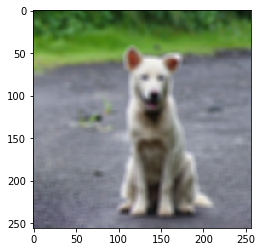

In [37]:
img = cv2.imread('dog.bmp')
print(img.shape)

dst = cv2.blur(img, (7,7))
imshow("",dst)

# 가우시안 필터링
- 나의 주변(센터)에 있는 가중치는 더 크게
- 보통 블러링할때, 평균 필터보다 가우시안 필터를 더 많이 사용함
- 표준편차가 큰 필터를 사용하면, 마스크 바깥쪽도 많이 가중치를 주는 것
- 표준편차가 엄청 크면 거의 평균 필터랑 비슷함

(256, 256, 3)


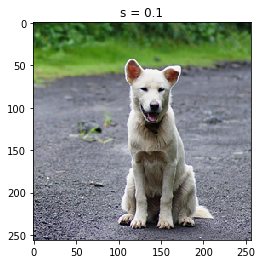

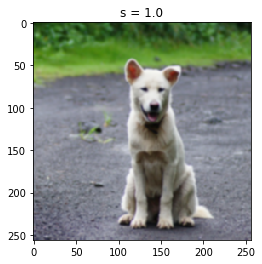

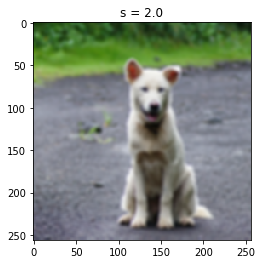

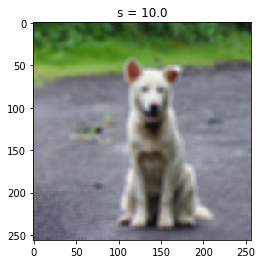

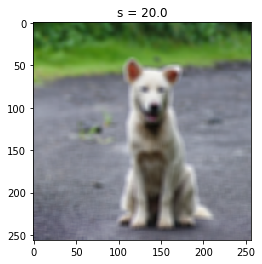

In [43]:
img = cv2.imread('dog.bmp')
print(img.shape)

dst = cv2.GaussianBlur(img, (7,7), 0.1)  # sigma = 0.1, 거의 원본그대로 나오게 하겠다.
imshow("s = 0.1",dst)

dst = cv2.GaussianBlur(img, (7,7), 1)  # sigma = 1 , 표준 정규분포
imshow("s = 1.0",dst)

dst = cv2.GaussianBlur(img, (7,7), 2)  # sigma = 2 
imshow("s = 2.0",dst)

dst = cv2.GaussianBlur(img, (7,7), 10)  # sigma = 10
imshow("s = 10.0",dst)

dst = cv2.GaussianBlur(img, (7,7), 20)  # sigma = 20
imshow("s = 20.0",dst)

In [50]:
img = cv2.imread('rose.bmp', 0)

sig = [1,3,20,50,90]
for s in sig:
    dst2 = cv2.GaussianBlur(img, (15,15), s)    # 필터의 크기를 키우면 blur 효과가 크긴한데, 클수록 연산속도가 느려짐
    cv2.imshow('dst', dst2)
    
    cv2.waitKey()
    cv2.destroyAllWindows()

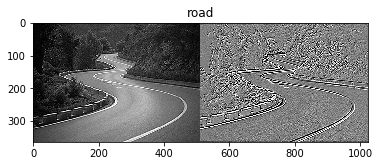

In [52]:
src = cv2.imread('road1.jpg', 0)

emboss = np.array([[1, 1, 0],
                   [1,  0, -1],
                    [0,  -1, -1]], np.float32)

dst = cv2.filter2D(src, -1, emboss, delta=128)

cv2.imshow('src', src)
cv2.imshow('dst', dst)

imshow('road', np.hstack((src,dst)))

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

# 샤프닝(sharpen)
- 선명도 개선
- 원래 영상 + 엣지

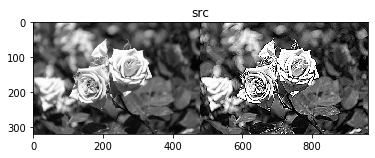

In [60]:
src = cv2.imread('rose.bmp', 0)
sharp = np.array([[-1,-1,-1],
                 [-1,9,-1],
                 [-1,-1,-1]], np.float32)

# 주변을 -1로 하는 필터를 만들면 됨

dst = cv2.filter2D(src, -1, sharp)

imshow('src', np.hstack((src,dst)))

cv2.waitKey()
cv2.destroyAllWindows()

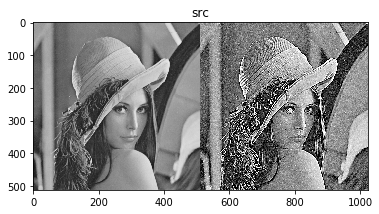

In [70]:
src = cv2.imread('lenna.bmp', 0)
sharp = np.array([[-1,-1,-1],
                 [-1,9,-1],
                 [-1,-1,-1]], np.float32)  # 강하게 샤프닝

# 주변을 -1로 하는 필터를 만들면 됨

dst = cv2.filter2D(src, -1, sharp)

imshow('src', np.hstack((src,dst)))

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()


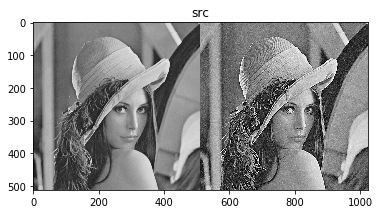

In [71]:
src = cv2.imread('lenna.bmp', 0)
sharp = np.array([[0,-1,0],
                 [-1,5,-1],
                 [0,-1,0]], np.float32)  # 약하게 샤프닝
# 더하면 1이 돼야함
# 주변을 -1로 하는 필터를 만들면 됨

dst = cv2.filter2D(src, -1, sharp)

imshow('src', np.hstack((src,dst)))

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

# 엣지 검출

- 밝기 변화가 큰 곳 : 고주파 성분
- 밝기 변화가 작은 곳 : 저주파 성분
- 1차 미분값을 이용한 방법 : 그냥 빼는 것, 전에 빼기로 한 검출 방식 / 1픽셀당 변화량 : 걍 뺄셈
- 2차 미분값을 이용한 방법 : 1차 미분한 것(걍 뺀것)을 다시 미분하면 됨
- 미분 값을 통해 값이 급격히 변하는 곳을 찾을 수 있음..!!
- dst = (dst > 20) * 255 -> 미분값이 20 보다 크면 1(True), 아니면 0(False)
- 엣지는 벡터 (x축 방향, y축 방향) -> 값이 두개인 (2 x 1) 행렬
- 영상이 주어지면 , 방향 벡터를 알 수 있고, 방향 벡터의 크기와 각도(방향)를 구할 수 있다.

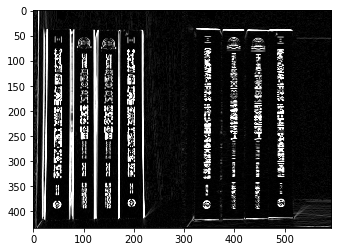

In [77]:
src = cv2.imread('book1.png', 0)
img_sobel_x = cv2.Sobel(src, cv2.CV_64F, 1, 0, ksize=3)
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)

img_sobel_y = cv2.Sobel(src, cv2.CV_64F, 0, 1, ksize=3)
img_sobel_y = cv2.convertScaleAbs(img_sobel_y)

imshow('', np.hstack((img_sobel_x,img_sobel_y)))

# x축 / y축 sobel 합치기

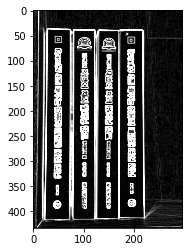

In [86]:
src = cv2.imread('book1.png', 0)
img_sobel_x = cv2.Sobel(src, cv2.CV_64F, 1, 0, ksize=3)
img_sobel_y = cv2.Sobel(src, cv2.CV_64F, 0, 1, ksize=3)
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)
img_sobel_y = cv2.convertScaleAbs(img_sobel_y)

img_sobel_xy = cv2.addWeighted(img_sobel_x, 1, img_sobel_y, 1, 0 ,src)  # cv2.addWeighted -> 오버플로우 없이 영상 합해주는 함수
imshow('', img_sobel_xy)

cv2.imshow('',img_sobel_xy)
cv2.waitKey()
cv2.destroyAllWindows()

# 윤곽선 안에있는 이미지만 원본으로 따오고 싶다..
# 1. 좌표로..??

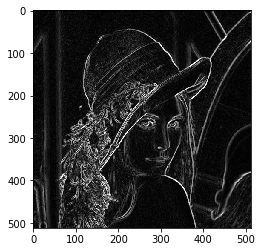

In [106]:
src = cv2.imread('lenna.bmp', 0)
img_sobel_x = cv2.Sobel(src, cv2.CV_64F, 1, 0, ksize=3)
img_sobel_y = cv2.Sobel(src, cv2.CV_64F, 0, 1, ksize=3)
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)
img_sobel_y = cv2.convertScaleAbs(img_sobel_y)

img_sobel_xy = cv2.addWeighted(img_sobel_x, 0.5, img_sobel_y, 0.5, 0 ,src)  # cv2.addWeighted -> 오버플로우 없이 영상 합해주는 함수
imshow('', img_sobel_xy)

# 2차 미분
- Laplacian함수
- 문제점 : 노이즈에 굉장히 취약하다.
- 그래서 전에 반드시 GaussianBlur를 적용해준다.
- 미분 검출기 문제점 : 노이즈에 약하다. (노이즈가 엣지로 보인다) 왜냐면 변화량이 보이기 때문에
- 가우시안 블러 -> Laplacian 순으로 하기

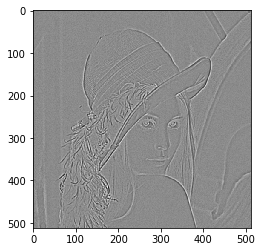

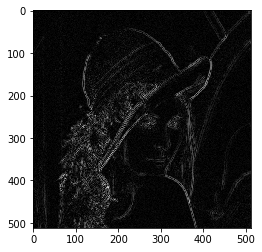

In [105]:
src = cv2.imread('lenna.bmp', 0)
src = cv2.GaussianBlur(src, (5, 5), 0)
laplacian = cv2.Laplacian(src, cv2.CV_32F)
dst = cv2.convertScaleAbs(laplacian)

imshow('', laplacian)
imshow('', dst)

cv2.imshow('dst',dst)

cv2.waitKey()
cv2.destroyAllWindows()

# 노이즈 생성법
- Blurring -> 노이즈를 없애는 의미도 있음
- MedianBlur -> sorting했을때, 중앙에 있는 값으로..
- 노이즈 제거에는 MedianBlur가 좋음./ salt&pepper 형태의 노이즈(검은/흰 점들 뿌린듯한)는 median filter가 효과적

In [108]:
src = cv2.imread('lenna.bmp', 0)

cv2.imshow('src', src)

for stddev in [10, 20, 30, 50, 70]:
    noise = np.zeros(src.shape, np.int32)
    cv2.randn(noise,0,stddev)
    
    dst1 = cv2.add(src, noise, dtype = cv2.CV_8UC1)
    dst2 = 
    desc = 'stddev = %d' % stddev
    cv2.putText(dst, desc, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, 255, 1, cv2.LINE_AA)
    # (이미지, 쓰고싶은 텍스트, 폰트 크기, 폰트 색깔, ...)
    # putText : 영어만 쓰고싶은 텍스트 이미지에 넣기
    
    cv2.imshow('dst', dst)
    cv2.waitKey()
    
    cv2.destroyAllWindows()

In [117]:
src = cv2.imread('lenna.bmp', 0)

for i in range(0, int(src.size / 10)):
    x = np.random.randint(0, src.shape[1]-1)
    y = np.random.randint(0, src.shape[0]-1)
    src[y, x] = (i % 2) * 255
    
dst1 = cv2.GaussianBlur(src, (21, 21), 1)
dst2 = cv2.medianBlur(src, 3)

cv2.imshow('src',src)
cv2.imshow('dst1',dst1)
cv2.imshow('dst2',dst2)

cv2.waitKey()
cv2.destroyAllWindows()    
    


# Gaussian / Median Blur로 노이즈 제거 후 배경/전경 골라내기

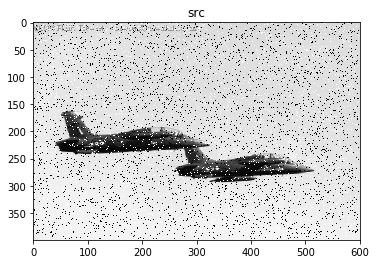

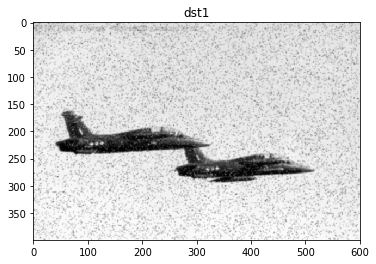

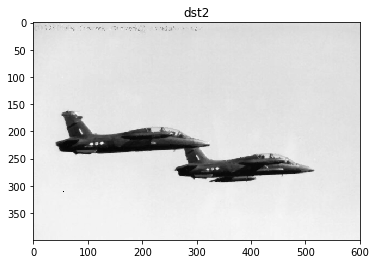

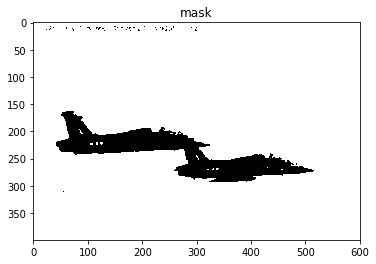

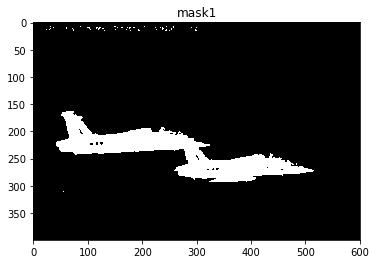

In [129]:
src = cv2.imread('zet.jpg', 0)

for i in range(0, int(src.size / 10)):
    x = np.random.randint(0, src.shape[1]-1)
    y = np.random.randint(0, src.shape[0]-1)
    src[y, x] = (i % 2) * 255
    
dst1 = cv2.GaussianBlur(src, (15, 15), 1)
dst2 = cv2.medianBlur(src, 3)

# 미디언블러로 노이즈 제거 후에..
ret, mask = cv2.threshold(dst2, 170, 255, cv2.THRESH_BINARY)
ret, mask1 = cv2.threshold(dst2,170,255, cv2.THRESH_BINARY_INV)
# 이미지, 임계값, 임계값 이상일 경우 취할 값 / 픽셀 값이 임계값보다 작으면 0으로 하기
# 적용한 threshold 값 = 100 = ret(return)

imshow('src',src)
imshow('dst1',dst1)
imshow('dst2', dst2)
imshow('mask',mask)
imshow('mask1', mask1)


# Web 기반 영상처리

In [4]:
%%writefile server.py
# 서버 만들기
# 장고랑 비슷한 느낌
# localhost:8000 가면 hello~ 보임
# server.py라는 데에서 만드는 것


import cv2
import numpy as np
from flask import Flask, request, render_template, redirect
import datetime

app = Flask(__name__)


@app.route('/')
def index():
    return render_template("imageprocessing.html", ctx ={"title":"영상처리"})

@app.route('/upload', methods=["POST"])
def upload():
    f = request.files['file1']
    filename="./static/" + f.filename      # static이라는 폴더에 저장할 것이다.
    f.save(filename)
    return redirect("/")
 
@app.route('/imageprocess')
def imageprocess():
    
    method = request.args.get("method")
    if method == "emboss" :
        # opencv embossing
        # save  /static/result.jpg   ,   static 폴더에 저장 
    
    return "hello~~"



if __name__ == '__main__':
    app.run(host='0.0.0.0', debug=True, port=8000)

Overwriting server.py
